In [305]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [306]:
import numpy as np
import pandas as pd

In [307]:
path = '/content/drive/MyDrive/Datasets/Hamoye/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(path)
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [309]:
# We see from the dataframe info our FullDate is not formated properly.
# formating FullDate to data type date time.
df['FullDate']= pd.to_datetime(df['FullDate'])

In [310]:
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [311]:
# Checking for missing values.
df.isnull().values.any()

False

In [312]:
df.set_index('FullDate',inplace= True)

In [313]:
df_daily= df.resample('D').sum()
df_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


## Question 11. Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0.5, 1.0, 'Daily Electricity Price')

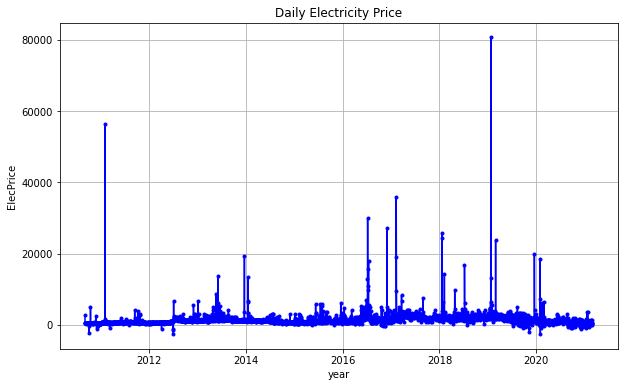

In [314]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,6))
plt.plot(df_daily.index,df_daily.ElecPrice, color='blue', marker='.')
plt.grid()
plt.xlabel('year')
plt.ylabel('ElecPrice')
plt.title('Daily Electricity Price')

## Question 12. Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [315]:
from statsmodels.tsa.stattools import adfuller
adf_result1 = adfuller(df_daily[ 'SysLoad' ])
P_value = round(adf_result1[ 1 ],6)
print(f'p-value: {P_value} ' ) 

p-value: 0.004254 


In [316]:
from statsmodels.tsa.stattools import adfuller
adf_result2 = adfuller(df_daily[ 'GasPrice' ])
P_value2 = round(adf_result2[ 1 ],6)
print(f'p-value: {P_value2} ' )

p-value: 0.045027 


## Question 13. Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [317]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'ElecPrice' ])

print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [318]:
df_daily = df_daily.reset_index()

In [319]:
len(df_daily)

3834

In [320]:
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [321]:
# We are creating a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’).
# Dropping the other columns.
df_Univ = df_daily[['FullDate','ElecPrice']]

In [322]:
df_Univ.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [323]:
df_Univ.columns = ['ds', 'y']

In [324]:
df_Univ.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [325]:
# Dividing the dataset into test and train data.
train = df_Univ.iloc[0:2757]
test = df_Univ.iloc[2757:]

print(f'The number of training data = {len(train)}')
print(f'The number of testing data = {len(test)}')

The number of training data = 2757
The number of testing data = 1077


In [326]:
df_Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3834 non-null   datetime64[ns]
 1   y       3834 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.0 KB


In [327]:
from fbprophet import Prophet

In [328]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [329]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [330]:
print('daily',+ +len(df_daily))
print('train',+ +len(train))
print('test',+ +len(test))

daily 3834
train 2757
test 1077


In [331]:
future = model.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast = model.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3829,2021-02-24,3567.126543,521.526056,6030.637065,1839.101359,5263.837555,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,785.898893,6599.307537,1835.878247,5267.238904,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,355.918132,6316.421061,1832.831386,5270.640252,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,0.078557,6019.982076,1832.185627,5274.041601,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610
3833,2021-02-28,3570.392819,38.692369,5807.905162,1832.220909,5277.442950,-691.914985,-691.914985,-691.914985,-342.634443,-342.634443,-342.634443,-349.280542,-349.280542,-349.280542,0.0,0.0,0.0,2878.477834


In [332]:
len(forecast)

3834

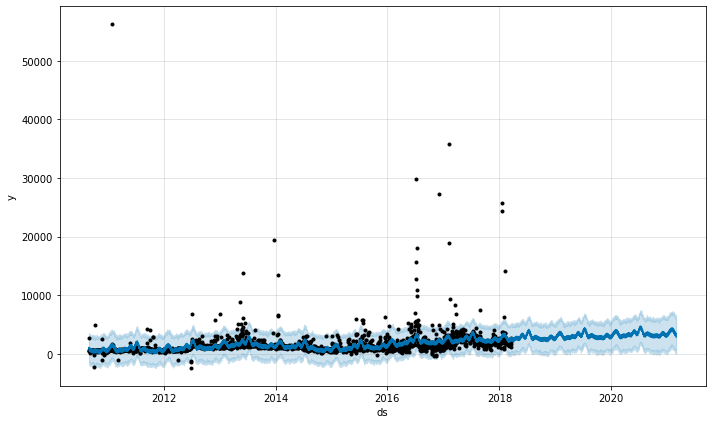

In [333]:
plot1= model.plot(forecast)

In [334]:
y_predict= forecast['yhat'].iloc[2757:]
y_predict.head()

2757    2536.337494
2758    2689.655459
2759    2788.705741
2760    2580.977221
2761    2256.367941
Name: yhat, dtype: float64

In [335]:
y_predict= np.array(y_predict)
y_predict

array([2536.33749353, 2689.65545937, 2788.70574126, ..., 3309.66071765,
       2966.46560959, 2878.47783411])

In [336]:
y_true= np.array(test['y'])
y_true

array([1833.   , 1730.49 , 2260.55 , ..., 1445.495,  488.98 ,  -98.985])

In [337]:
print(len(y_predict))
print(len(y_true))

1077
1077


In [338]:
y_predict[0]

2536.337493533191

In [339]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_error
mean_squared_error(y_true, y_predict)

10356526.60190019

# Question 14. Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [340]:
import math
sum=0
for i in range(len(y_true)):
  b=abs((y_true[i]- y_predict[i]) / y_true[i])
  sum+=b
print(sum)

5917.847272572721


In [341]:
mape= sum/len(y_true)
mean_absolute_percent_error= round(mape*100,2)
mean_absolute_percent_error

549.48

In [342]:
mean_absolute_percentage_error(y_true, y_predict)

5.494751413716547

# Q 15. What is the RMSE in 2 decimal places?

In [343]:
mean_square_error= round(mean_squared_error(y_true, y_predict, squared=False),2)
mean_square_error

3218.16

# Q 16. If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

In [344]:
future = model.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3829,2021-02-24,3567.126543,620.511982,6482.060442,1961.972346,5395.004836,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,626.769753,6824.878827,1960.451918,5398.813934,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,317.531193,6137.946495,1958.931489,5400.561590,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,118.699621,5786.353408,1957.411061,5401.422691,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610
3833,2021-02-28,3570.392819,130.736294,5974.473298,1955.890632,5404.525849,-691.914985,-691.914985,-691.914985,-342.634443,-342.634443,-342.634443,-349.280542,-349.280542,-349.280542,0.0,0.0,0.0,2878.477834


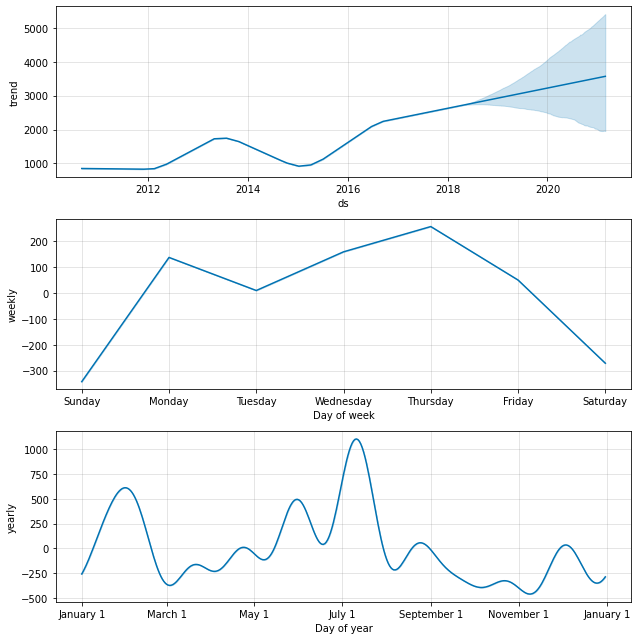

In [345]:
plot2 = model.plot_components(forecast)

# Answer: Around July

In [346]:
df_daily

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [347]:
df_new = df_daily.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y","SysLoad" : "Add1" , "Tmax" : "Add2","GasPrice":"Add3" })
df_new.head()

,ds,Add2,Add1,Add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [348]:
model1= Prophet()

model1.add_regressor('Add1')
model1.add_regressor('Add2')
model1.add_regressor('Add3')

In [349]:
# Dividing the dataset into test and train data.
train1 = df_new.iloc[0:2757]
test1 = df_new.iloc[2757:]

print(f'The number of training data = {len(train)}')
print(f'The number of testing data = {len(test)}')

The number of training data = 2757
The number of testing data = 1077


In [353]:
train1.head()

,ds,Add2,Add1,Add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [350]:
model1.fit(train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [355]:
future1 = model1.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast1 = model1.predict(future1)
forecast1.tail()

ValueError: ignored

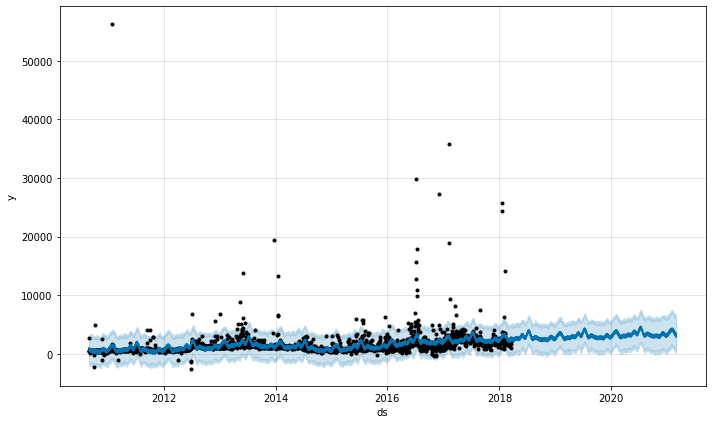

In [351]:
plot3= model.plot(forecast)